## Setup


In [1]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import re
from string import punctuation

from tqdm import tqdm

tqdm.pandas()


In [2]:
df = pd.read_csv("../data/Merged/reviews_cleaned_nostop.csv")

df = df.loc[:, ["review_title_cleaned", "review_text_cleaned", "review_type"]]
df["review_title_cleaned"] = df["review_title_cleaned"].astype(str)
df["review_text_cleaned"] = df["review_text_cleaned"].astype(str)

df


,review_title_cleaned,review_text_cleaned,review_type
0,hey !,what be there to say about a fantastic chocola...,positive
1,tasty & nutritious in one easy to administer p...,my 15 month-old twin boy be not big fan of spi...,positive
2,absolutely tasty,"okay , so these little can be not cheap , but ...",positive
3,a good daily roast,this coffee have become one of my daily favori...,positive
4,newman 's own turkey & vegetable catfood,i have four cat with differ tastebuds/likes . ...,positive
...,...,...,...
29995,have an artificial vanilla flavor,sorry but i be look for a nice madagascar vani...,negative
29996,still wait .......,i order this item in august and i be a premium...,negative
29997,expensive !,do yourself a favor and go to the nearest supe...,negative
29998,yucky vegetable smoothie add-in,"gerber change the recipe for the worse , this ...",negative


## Title & Review Lengths


In [3]:
df["title_length"] = df["review_title_cleaned"].apply(lambda title: len(title.split()))
df["text_length"] = df["review_text_cleaned"].apply(lambda text: len(text.split()))


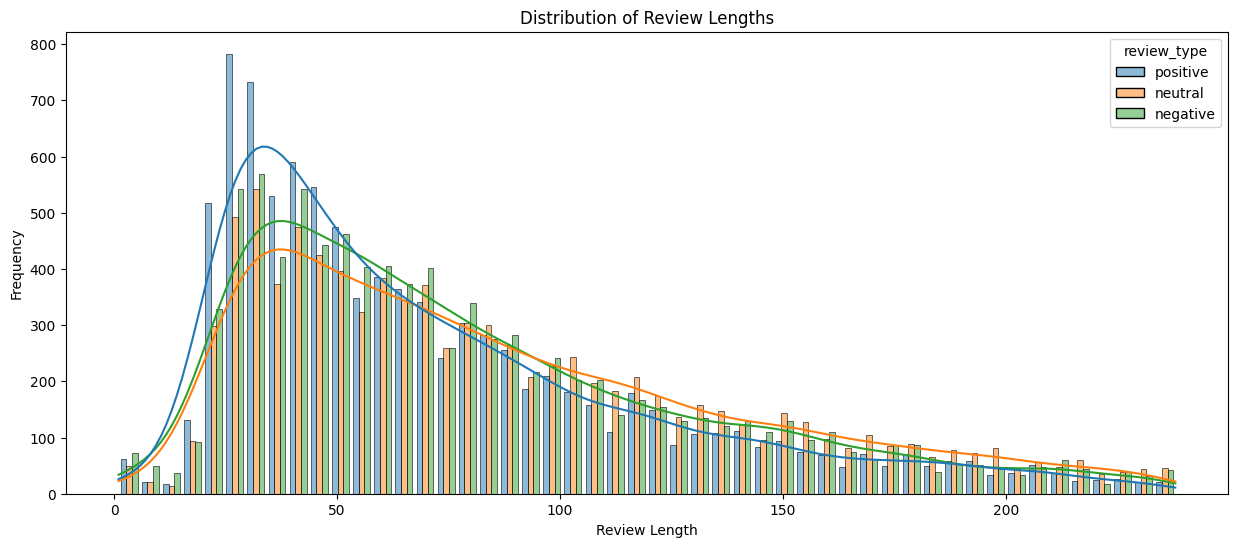

In [4]:
plt.figure(figsize=(15, 6))

stats = boxplot_stats(df["text_length"])[0]
low, high = stats["whislo"], stats["whishi"]
data = df.query(f"text_length >= {low} and text_length <= {high}")

sns.histplot(
    data,
    x="text_length",
    hue="review_type",
    multiple="dodge",
    shrink=0.8,
    bins=50,
    kde=True,
)

plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()


In [5]:
for cat in ["positive", "negative", "neutral"]:
    avg = df.query(f"review_type == '{cat}'")["text_length"].mean()
    print(f"Average {cat:>8} reviews length={avg:.2f}")


Average positive reviews length=86.70
Average negative reviews length=99.16
Average  neutral reviews length=106.77


While positive comments tend to be shorter (<50 words), the reviews of different types (positive, negative, neutral) are roughly evenly distributed across the lengths.

## Punctuation / Special Characters

In [6]:
def get_punct_count(text):
    return len(re.findall(rf"[{punctuation}]", text))


df["num_special_chars"] = df["review_text_cleaned"].apply(get_punct_count)


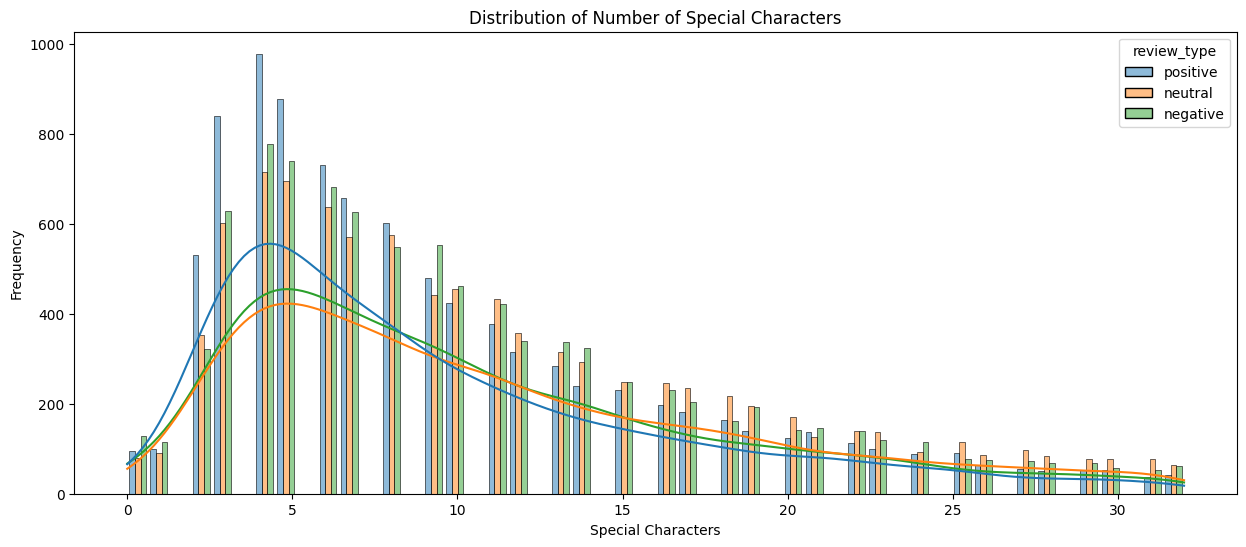

In [7]:
plt.figure(figsize=(15, 6))

stats = boxplot_stats(df["num_special_chars"])[0]
low, high = stats["whislo"], stats["whishi"]
data = df.query(f"num_special_chars >= {low} and num_special_chars <= {high}")

sns.histplot(
    data,
    x="num_special_chars",
    hue="review_type",
    multiple="dodge",
    shrink=0.8,
    bins=50,
    kde=True,
)

plt.title("Distribution of Number of Special Characters")
plt.xlabel("Special Characters")
plt.ylabel("Frequency")
plt.show()


In [8]:
for cat in ["positive", "negative", "neutral"]:
    avg = df.query(f"review_type == '{cat}'")["num_special_chars"].mean()
    print(f"Average number of special characters in {cat:>8} reviews={avg:.2f}")


Average number of special characters in positive reviews=11.86
Average number of special characters in negative reviews=14.22
Average number of special characters in  neutral reviews=14.83


## Presence/Frequency of Words


In [9]:
df = pd.read_csv("../data/Merged/reviews_cleaned_nostop.csv")

df = df.loc[:, ["review_title_cleaned", "review_text_cleaned", "review_type"]]
df["review_title_cleaned"] = df["review_title_cleaned"].astype(str)
df["review_text_cleaned"] = df["review_text_cleaned"].astype(str)

cleaned_data: dict[str, pd.Series] = dict(
    [
        (type, df.query(f"review_type == '{type}'")["review_text_cleaned"])
        for type in ["positive", "neutral", "negative"]
    ]
)


def show_wordcloud(reviews: pd.Series):
    words = " ".join(reviews)

    wordcloud = WordCloud().generate_from_text(words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")


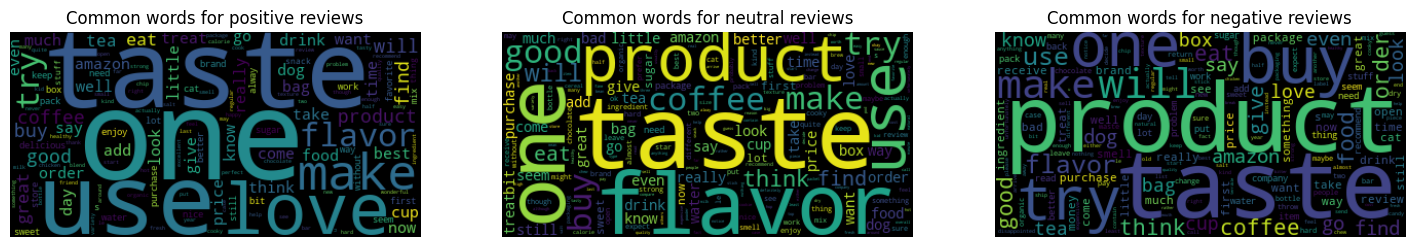

In [10]:
plt.figure(figsize=(18, 6))

for idx, type in enumerate(["positive", "neutral", "negative"]):
    plt.subplot(1, 3, idx + 1)
    show_wordcloud(cleaned_data[type])
    plt.title(f"Common words for {type} reviews")

plt.show()
